# Deep Image Priors with ViT

## ViT Implementation

In [6]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

from deepprior.models import HourglassViT
from deepprior.datasets import SingleImageDataset

## Load Model

In [2]:
import torch

In [12]:
def convert_to_image(arr):
    raw = arr[0, ...].permute((1, 2, 0)) / 255
    raw = (raw - raw.min()) / (raw.max() - raw.min())
    raw = raw.numpy()
    #raw = torch.clamp(raw, 0, 1)
    
    return raw

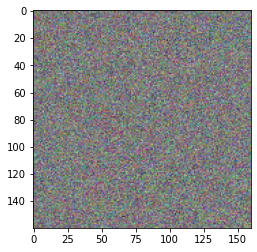

In [14]:
for depth in [3, 6, 9, 12]:
    for patch_dim in [8, 16, 32]:
        input_im = torch.rand(1, 3, 32*5, 32*5).float().to(torch.device('cuda'))
        
        model = HourglassViT(
            image_size=(32*5, 32*5),
            patch_size=(patch_dim, patch_dim),
            num_classes=10,
            dim=1024,
            depth=depth,
            heads=16,
            mlp_dim=2048,
            dropout=0.1,
            emb_dropout=0.1).float().to(torch.device('cuda'))
        
        outputs = model(input_im)
        converted_im = convert_to_image(outputs.detach().cpu())
        
        plt.imshow(converted_im)
        plt.imsave(f'sample_p{patch_dim}_d{depth}.png', converted_im)
        

## Test Output

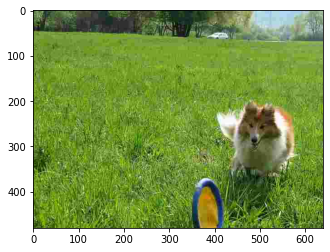

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


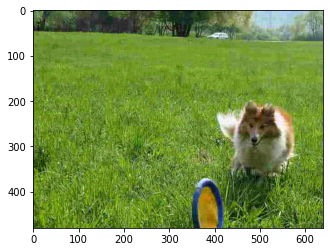

In [56]:
test_dl = DataLoader(ds)
for test_input, test_image in test_dl:
    pred_image = model(test_input.to(config.device)).detach().cpu()
    
    plt.imshow(test_image[0, ...].permute((1, 2, 0)) / 255)
    plt.show()
    
    plt.imshow(pred_image[0, ...].permute((1, 2, 0)) / 255)
    plt.show()
    
    break

In [57]:
import numpy as np

def convert_to_image(arr):
    return torch.clamp(arr[0, ...].permute((1, 2, 0)) / 255, 0, 1).numpy()

plt.imsave('lossy_70.png', convert_to_image(pred_image))